# 3.4 Shrinkage Methods

By retaining a subset of the predictors and discarding the rest, subset selection produces a model that is interpretable and has possibly lower prediction error than the full model. However, because it is a discrete process— variables are either retained or discarded—it often exhibits high variance, and so doesn’t reduce the prediction error of the full model. Shrinkage methods are more continuous, and don’t suffer as much from high variability.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ch3 import LinearRegression, SVD
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

## 3.4.1 Ridge Regression

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares,

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}

where $\lambda \ge 0$ is a complexity parameter that controls the amount of shrinkage: the larger the $\lambda$, the greater the amount of shrinkage. The idea of penalizing by the sum-of-squares of the parameters is also used in neural networks, a.k.a. *weight decay* (Chapter 11).

An equivalent way to write the ridge problem is to make explicit the size constraint on the parameters, as


\begin{equation}
\begin{aligned}
\hat\beta^{\text{ridge}} & = {\arg\min}_\beta \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 \\ 
& \text{ subject to } \sum_{j=1}^p \beta_j^2 \le t,
\end{aligned}
\end{equation}



where $t$ has a one-to-one correspondence with $\lambda$.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients, this problem is alleviated.


### Scaling and centering

The ridge solutions are not equivariant (not comparable)under scaling of the inputs, and so  one normally standardizes the inputs before solving the ridge problem.

Also notice that the intercept $\beta_0$ has been left out of the penalty term. Penalization of the intercept would make the procedure depend on the origin chosen for $Y$; i.e., adding a constant $c$ to each of the targets $y_i$ (i.e. simply shifting) would not simply result in a shift of the predictions by the same constant $c$.

It can be shown that the ridge solution can be separated into two parts, after reparametrization using *centered* inputs: Each $x_{ij}$ gets replaced by $x_{ij}-\bar{x}_j$.
1. We estimate $\beta_0$ by the mean response $\bar{y} = \frac{1}{N}\sum_1^N y_i$.
2. The remaining coefficients get estimated by a ridge regression without intercept, using centered $x_{ij}$.

Henceforth we assume that this centering has been done, so that the input matrix $\mathbf{X}$ has $p$ columns rather than $p+1$.

### Matrix form

The equation (1) could be written in the following matrix form: 

\begin{equation}
\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta
\end{equation}

The ridge regression solutions are easily seen to be

\begin{equation}
\hat\beta^{\text{ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
\end{equation}

where $\mathbf{I}$ is the $p\times p$ identity matrix. Notice that the ridge solution is again a linear function of $\mathbf{y}$ by the choice of quadratic penalty $\beta^T\beta$, resulting in addition of a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. _This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank_. It was actually the main motivation for ridge regression when it was first introduced in statistics (Hoerl and Kennard, 1970).

__Remark__: It is all about penalty. In equation (1), the
penalty was added via $\lambda$ that corresponds to $t$ in equation (2) one-to-one. Therefore, our new `OLS` estimation should have an additional parameter. 

In [6]:
def ridge_regression(X :np.ndarray, Y :np.ndarray, lam :float) -> np.ndarray:
    """
    Y need to be centered by subtracting the mean \\
    beta_intercept = Y.mean() \\ 
    X need to be normalized \\ 
    lam: value of lambda 
    The coefficients could be estimated via equation (4)
    """
    pass

### Review of Singular Value Decomposition (SVD) 

Before, we implement the shrinkage method, we need to review _singular value decomposition_ (SVD). 

![svd](https://uploads-ssl.webflow.com/5b1d427ae0c922e912eda447/5feb62f53532cb257a8f901d_open_compressed.jpg)

The matrix $U$ and $V^T$ represent _rotation_ and _reflection_, whereas $\Sigma$ represents the scaling process. 

Let $ X $ be an $ m \times n $ matrix of rank $ p $.

Necessarily, $ p \leq \min(m,n) $.

In this lecture, we’ll think of $ X $ as a matrix of data.

- each column is an **individual** – a time period or person, depending on the application  
- each row is a **random variable** describing an attribute of a time period or a person, depending on the application  


We’ll be interested in  two  cases

- A **short and fat** case in which $ m << n $, so that there are many more columns (individuals) than rows (attributes).  
- A  **tall and skinny** case in which $ m >> n $, so that there are many more rows  (attributes) than columns (individuals).  


We’ll apply a **singular value decomposition** of $ X $ in both situations.

In the first case in which there are many more individuals $ n $ than attributes $ m $, we learn sample moments of  a joint distribution  by taking averages  across observations of functions of the observations.

In this $ m < < n $ case,  we’ll look for **patterns** by using a **singular value decomposition** to do a **principal components analysis** (PCA).

In the $ m > > n $  case in which there are many more attributes $ m $ than individuals $ n $, we’ll proceed in a different way.

A **singular value decomposition** of an $ m \times n $ matrix $ X $ of rank $ p \leq \min(m,n) $ is

$$
X  = U \Sigma V^T
$$

where

$$
\begin{aligned}
UU^T &  = I  &  \quad U^T U = I \cr    
VV^T & = I & \quad V^T V = I
\end{aligned}
$$

where

- $ U $ is an $ m \times m $ matrix whose columns are eigenvectors of $ X^T X $  
- $ V $ is an $ n \times n $ matrix whose columns are eigenvectors of $ X X^T $  
- $ \Sigma $ is an $ m \times n $ matrix in which the first $ p $ places on its main diagonal are positive numbers $ \sigma_1, \sigma_2, \ldots, \sigma_p $ called **singular values**; remaining entries of $ \Sigma $ are all zero  
- The $ p $ singular values are square roots of the eigenvalues of the $ m \times m $ matrix  $ X X^T $ and the $ n \times n $ matrix $ X^T X $  
- When $ U $ is a complex valued matrix, $ U^T $ denotes the **conjugate-transpose** or **Hermitian-transpose** of $ U $, meaning that
  $ U_{ij}^T $ is the complex conjugate of $ U_{ji} $.  
- Similarly, when $ V $ is a complex valued matrix, $ V^T $ denotes the **conjugate-transpose** or **Hermitian-transpose** of $ V $  


In what is called a **full** SVD, the  shapes of $ U $, $ \Sigma $, and $ V $ are $ \left(m, m\right) $, $ \left(m, n\right) $, $ \left(n, n\right) $, respectively.

There is also an alternative shape convention called an **economy** or **reduced** SVD .

Thus, note that because we assume that $ X $ has rank $ p $, there are only $ p $ nonzero singular values, where $ p=\textrm{rank}(X)\leq\min\left(m, n\right) $.

A **reduced** SVD uses this fact to express $ U $, $ \Sigma $, and $ V $ as matrices with shapes $ \left(m, p\right) $, $ \left(p, p\right) $, $ \left( n, p\right) $.

In [19]:
np.random.seed(666)
X = np.random.rand(5,2)  # tall-skinny
U, S, V = np.linalg.svd(X,full_matrices=True)  # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices=False) # economy SVD
print("U = \n", pd.DataFrame(U))  # 5 by 5 
print("S = \n", pd.DataFrame(S))  # 2 by 1 
print("V = \n", pd.DataFrame(V))  # 2 by 2

U = 
           0         1         2         3         4
0 -0.623682 -0.294867 -0.660291 -0.287420 -0.074026
1 -0.570693 -0.194381  0.590279  0.209057 -0.494360
2 -0.436494  0.771317  0.178785 -0.326006  0.276223
3 -0.205417  0.290547 -0.325827  0.869983  0.101748
4 -0.229364 -0.442631  0.278316  0.102639  0.814540
S = 
           0
0  1.722058
1  0.756451
V = 
           0         1
0 -0.781690 -0.623667
1  0.623667 -0.781690


In [20]:
print("U = \n", pd.DataFrame(Uhat))  # 5 by 2
print("S = \n", pd.DataFrame(Shat))  # 2 by 1 
print("V = \n", pd.DataFrame(Vhat))  # 2 by 2

U = 
           0         1
0 -0.623682 -0.294867
1 -0.570693 -0.194381
2 -0.436494  0.771317
3 -0.205417  0.290547
4 -0.229364 -0.442631
S = 
           0
0  1.722058
1  0.756451
V = 
           0         1
0 -0.781690 -0.623667
1  0.623667 -0.781690


In [5]:
lr = LinearRegression()
lr.normalize_dataset()
lr.split_dataset()

The shape of splitted dataset is: (67, 8)
The shape of splitted dataset is: (30, 8)
The shape of splitted dataset is: (67, 1)
The shape of splitted dataset is: (30, 1)


Now, we will run the regression with shrinkage methods.

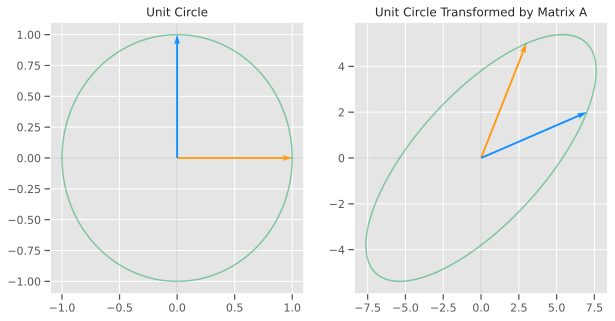

In [29]:
svd = SVD()
with plt.style.context("ggplot"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
unit_circle = np.array([[1, 0], [0, 1]])
svd.matrixToPlot(axes[0], unit_circle)
axes[0].set_title("Unit Circle")
# unit circle transformed by A
A = np.array([[3, 7], [5, 2]])
svd.matrixToPlot(axes[1], A)
axes[1].set_title("Unit Circle Transformed by Matrix A")
fig.show()

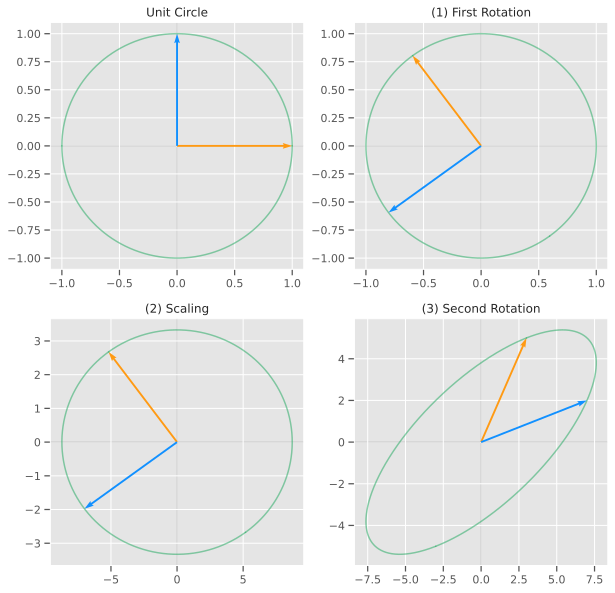

In [31]:
U, D, V = np.linalg.svd(A)
with plt.style.context("ggplot"):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
unit_circle = np.array([[1, 0], [0, 1]])
svd.matrixToPlot(axes[0, 0], unit_circle)
axes[0, 0].set_title("Unit Circle")
# unit circle transformed by A
svd.matrixToPlot(axes[0, 1], V)
axes[0, 1].set_title("(1) First Rotation")
svd.matrixToPlot(axes[1, 0], np.diag(D).dot(V))
axes[1, 0].set_title("(2) Scaling")
svd.matrixToPlot(axes[1, 1], U.dot(np.diag(D)).dot(V))
axes[1, 1].set_title("(3) Second Rotation")
fig.show()
